In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy import stats
import laplacejumps as lj
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import GMM
from scipy.optimize import minimize, least_squares

In [2]:
%matplotlib inline
np.set_printoptions(precision=4)
mpl.pyplot.style.use('seaborn-talk')

In [4]:
current_data = pd.concat([#pd.read_hdf('../data/spy_2008-2012_300ms.hdf', 'table'),
                          pd.read_hdf('../data/spy_2000-2008_300ms.hdf', 'table')])
daily_rtn = (current_data.diff() - current_data.diff().mean()).resample('D').sum()
daily_rtn.name = 'Daily Return'

In [5]:
log_rtns = pd.DataFrame(current_data.diff()).rename(columns={'log_price':'log_rtn'})

In [6]:
log_rtns.describe()

log_rtn
count  1.544010e+08
mean  -8.044527e-11
std    2.943810e-04
min   -2.249658e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    2.249658e+00

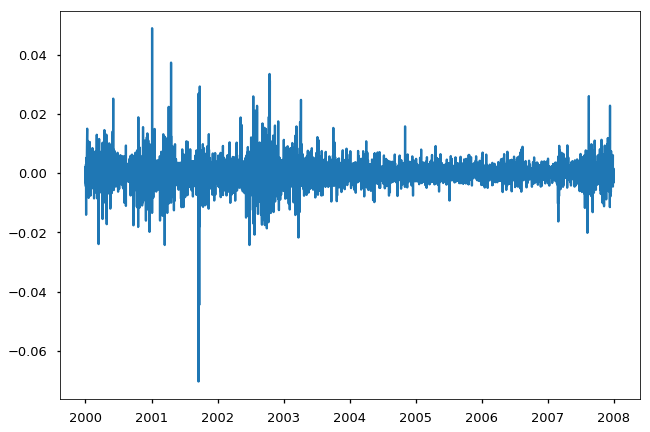

In [7]:
log_rtn_fig, log_rtn_ax = mpl.pyplot.subplots()
log_rtn_ax.plot(log_rtns.resample('5min').sum().dropna())
log_rtn_ax.set_xlabel("")

In [8]:
five_min_quad =  current_data.resample('5min').last().diff().groupby(pd.TimeGrouper('D')).apply(lj.real_vol)

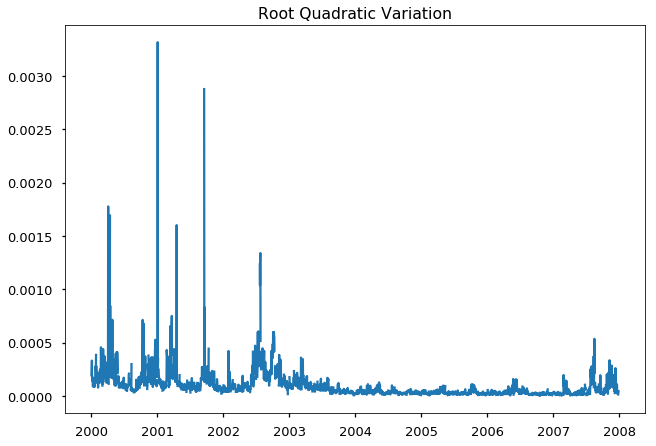

In [9]:
five_min_quad_fig, five_min_quad_ax = mpl.pyplot.subplots()
five_min_quad_ax.plot(five_min_quad)
five_min_quad_ax.set_title('Root Quadratic Variation')

In [10]:
five_min_quad.dropna().apply(np.sqrt).describe() 

count    2010.000000
mean        0.008738
std         0.004865
min         0.002131
25%         0.005283
50%         0.007594
75%         0.010669
max         0.057584
Name: log_price, dtype: float64

In [11]:
local_real_vol = log_rtns.resample('1min').sum().rolling(window=50).apply(lj.real_vol).rename(
    columns={'log_rtn':'Local RV'})

In [12]:
local_real_vol.apply(np.sqrt).describe()

Local RV
count  683399.000000
mean        0.003281
std         0.001987
min         0.000000
25%         0.001878
50%         0.002749
75%         0.004194
max         0.101661

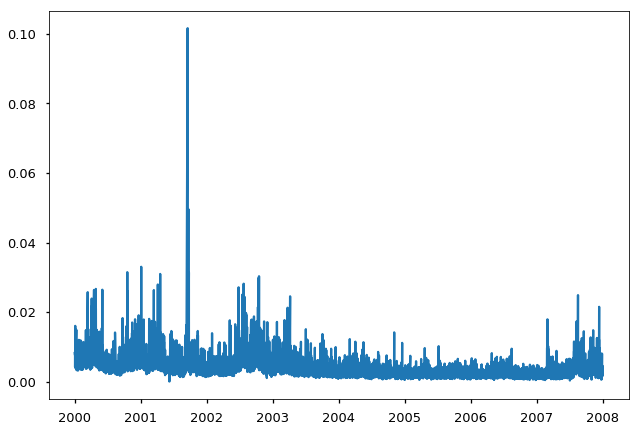

In [13]:
mpl.pyplot.plot(local_real_vol.dropna().applymap(np.sqrt))